In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

In [69]:
df = pd.read_csv('survey_results_public.csv')
df.head(2)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [70]:
df = df[['Country','EdLevel','YearsCodePro','Employment','ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly':'Salary'},axis=1)
df.head(2)

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN


In [71]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23435 non-null  object 
 1   EdLevel       23435 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23435 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [73]:
df = df.fillna(method='ffill')
df.isnull().sum()

C:\Users\dkewa\AppData\Local\Temp\ipykernel_3456\1263580491.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [74]:
df = df.drop('Employment',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23435 non-null  object 
 1   EdLevel       23435 non-null  object 
 2   YearsCodePro  23435 non-null  object 
 3   Salary        23435 non-null  float64
dtypes: float64(1), object(3)
memory usage: 915.4+ KB


In [75]:
df['Country'].value_counts()

Country
United States of America                                4677
Germany                                                 2046
Ukraine                                                 1474
United Kingdom of Great Britain and Northern Ireland    1391
India                                                   1037
                                                        ... 
Brunei Darussalam                                          1
Burundi                                                    1
Barbados                                                   1
Mali                                                       1
Haiti                                                      1
Name: count, Length: 166, dtype: int64

In [76]:
def short_category(categories,cutoff):
    categorical_map = {}
    for i in range (len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'other'
    return categorical_map

In [77]:
country_map = short_category(df.Country.value_counts(),400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts(ascending=False)

Country
other                                                   7123
United States of America                                4677
Germany                                                 2046
Ukraine                                                 1474
United Kingdom of Great Britain and Northern Ireland    1391
India                                                   1037
France                                                   918
Canada                                                   871
Brazil                                                   685
Poland                                                   586
Netherlands                                              561
Spain                                                    559
Italy                                                    540
Australia                                                510
Sweden                                                   457
Name: count, dtype: int64

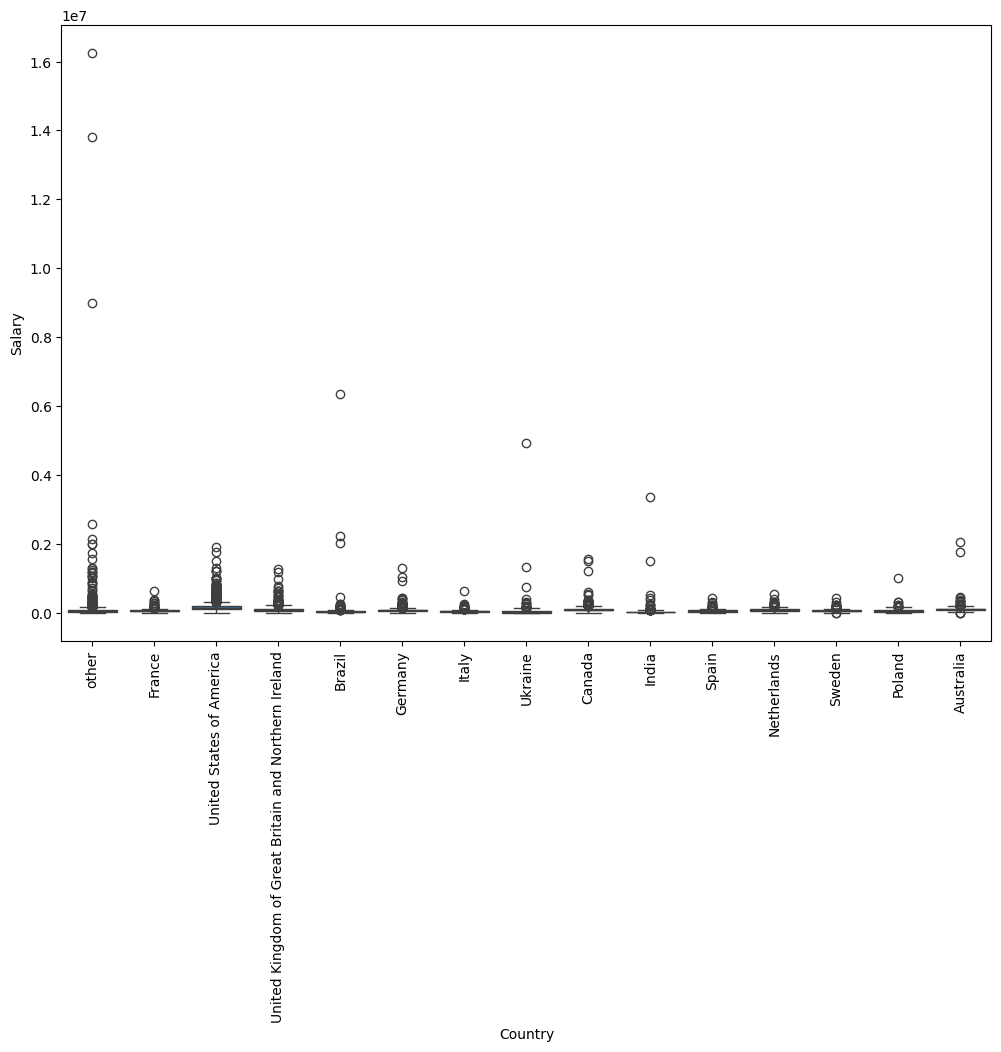

In [78]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
sns.boxplot(df,y='Salary',x='Country',ax=ax)
plt.xticks(rotation=90)
plt.show()

In [79]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary']>= 10000]
df = df[df['Country'] != 'other']

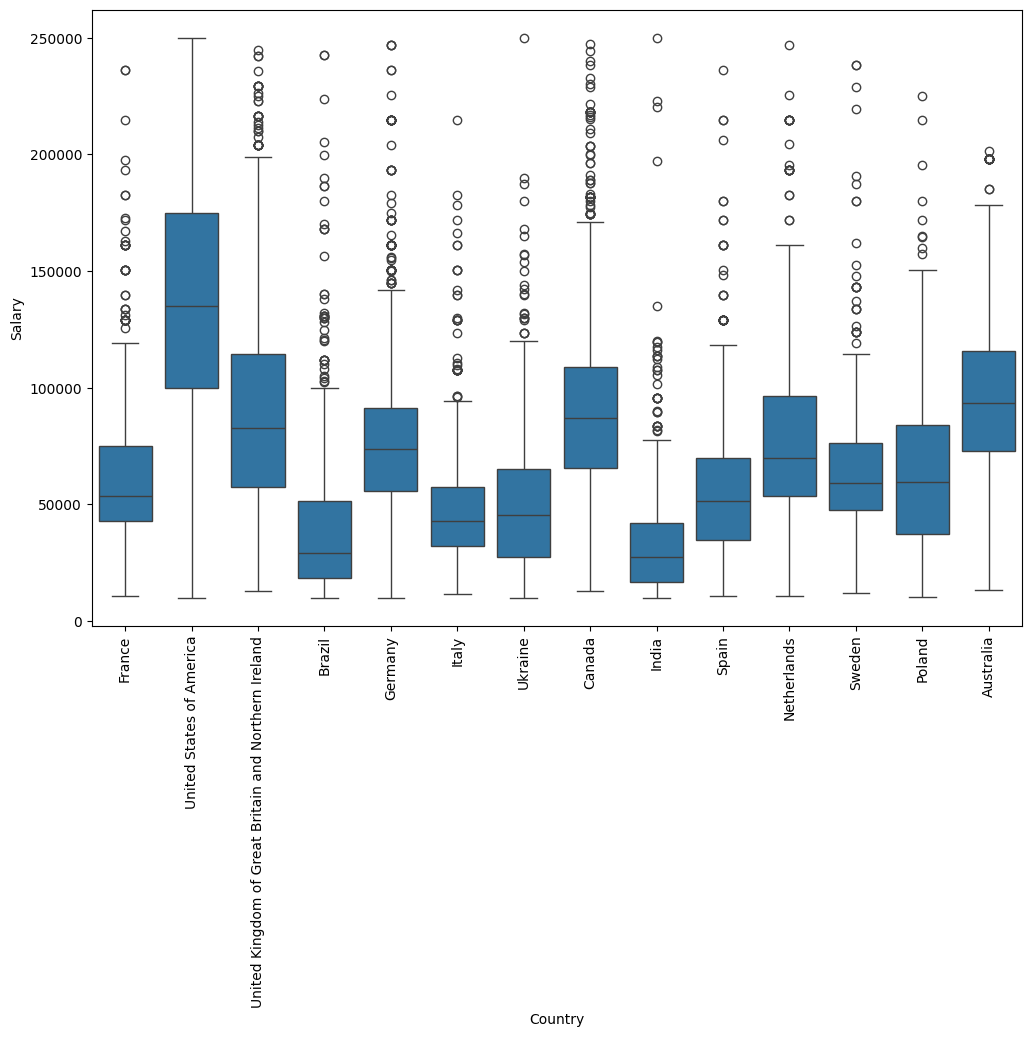

In [80]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
sns.boxplot(df,y='Salary',x='Country',ax=ax)
plt.xticks(rotation=90)
plt.show()

In [81]:
df['YearsCodePro'].unique()

array(['17', '7', '18', '25', '30', '50', '27', '1', '4', '15', '11',
       '23', '10', '8', '12', '26', '40', '16', '9', '22', '20', '28',
       '13', '3', '35', '5', '31', '41', '36', '24', '6', '14',
       'Less than 1 year', '2', '38', '32', '34', '21',
       'More than 50 years', '19', '29', '43', '33', '45', '37', '44',
       '42', '39', '46', '49', '48', '47'], dtype=object)

In [99]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df['YearsCodePro'].unique()

array([None], dtype=object)

In [100]:
df['EdLevel'].unique()

array(['Other'], dtype=object)

In [101]:
def clean_education(x):
    if x is None:
        return 'Unknown'
    
    # Normalize case to avoid case sensitivity issues
    x = x.lower()
    
    if "bachelor's degree" in x:
        return "Bachelor's degree"
    if "master's degree" in x:
        return "Master's degree"
    if "secondary school" in x:
        return "Secondary school"
    if "associate degree" in x:
        return "Associate degree"
    if "professional degree" in x:
        return 'Post Grad'
    else:
        return 'Other'  # Default case

# Apply the function to the 'EdLevel' column
df['EdLevel'] = df['EdLevel'].apply(clean_education)


In [102]:
df['EdLevel'].unique()

array(['Other'], dtype=object)